<a href="https://colab.research.google.com/github/AngelloDavincii/Data_Science_Cheatsheets/blob/main/CheatSheetDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:
This is a jupyter notebook that tries to summarize all the concept seen
in the data science track on datacamp and complement this course with research, comments and other things that can be useful at the time of make a data analysis. The idea of this series of Jupyter notebooks is create a "cheat sheet" for the basics in each step of data science cycle.<br>



# 1. Manipulation of dataframes

In [ ]:
dataframe.info() #displays the names of colums and the types
dataframe.head() #displays the firts elements from dataframe
dataframe.describe() #displays basic statistics
dataframe.values #displays values in a two dimensional numpy array
dataframe.columns #displays columns names from dataframes 
dataframe.shape #number of columns and rows
data.columns = ["name1","name2","name3"] #rename columns
del data["column name"] # drop column

In [ ]:
# Set dataframe index

# It makes that this columns works like index
data = data.set_index("name")
# To make multiple columns work like index
data = data.set_index(["column1","column2"])
# Remove the index
data.reset_index(drop = True)

# change order from index
ordered = ["number1","number2"]
data.reindex(ordered)
# also you can reindex a dataframe with the index of another dataframe
data.reindex(datos.index).ffill()
#ffill() replace all the NaN values with something

In [ ]:
# Count unique values in column
print(df.column.value_counts())

# Express the counts as proportions
print(df.column.value_counts(normalize = True))

### 1.1 Subsetting dataframe (Multiple methods)

In [ ]:
# Subset dataframe by column
dogs[["breed","hight_cm"]]
# Filter some column with a conditional
dogs[dogs["height_cm"] > 60]
# Combining multiple conditions
dogs[(dogs["height_cm"] > 60) & (dogs["weight"] > 100)]
#subset using isin can filter a categorical column easily
is_black_or_brown = dogs["color"].isin(["Black","Brown"])
# or filter
dogs[dogs["color"].isin(["Black","Brown"])]
#sort by columns
dogs.sort_values(["weight_kg","height_cm"], ascending = False)

#sort by indexes
#important to put level
data.sort_index(level = ["column1","column2"], ascending = [True, False])

# add new columns to dataframe
data["new_column"] = data["old_column"] / 100

In [ ]:
# LOC subsetting
dogs.loc[["filter1","filter2"]]
data.loc[[("filter column1","filter2 column1 "),("filter1 column2","filter2 column2")]]

# Slicing data frame
# FIRST YOU NEED TO SORT THE DATAFRAME BY INDEX
data.loc["third row":"sixth row"]
data.loc[("first row","third row"):("fifth row", "eigth row")]
#slicing columns
data.loc[:,"first column":"tenth column"]
# slicing iloc
data.iloc[1:3 , 4:10]

### 1.2 Column basic stats

In [ ]:
data["dogs"].mean()  # get mean
data["dogs"].median()  # get median
data["dogs"].mode()  # get mode
data["dogs"].min()  # get min
data["dogs"].max()  # get max
data["dogs"].var()  # get variance
data["dogs"].std()  # get standard deviation
data["dogs"].sum()  # get sum
data["dogs"].quartile(param)  # get quartile PARAMETER receive the quartile that you want

# Also you can complement this functions with group by to quickly compare groups with stats
# groupby https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html 
data.groupby(["weight"]).mean() 

In [ ]:
# .agg method
#supposse that we create the following function
def quartile30(column):
    return column.quartile(30)
#now we can use the function like this
data["dogs"].agg(quartile30)
# you can pass more than one function
data["dogs"].agg([quartile30,np.mean, np.median,max,min])

In [ ]:
# Acumulative stats this can work with columns and rows setting parameter axis
# For more information about output or use check: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html 
data["dogs"].cumsum() # it sums row by row from a columns
data["dogs"].cummax() 
data["dogs"].cummix()
data["dogs"].cumprod()

### 1.3 Pivot tables and crosstab

In [ ]:
# pivot tables https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 

table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum, fill_value=0)
# Values are the green values 
# Index are like the categories or groupby columns
# Columns Also categorize the dataframe by the levels of this column

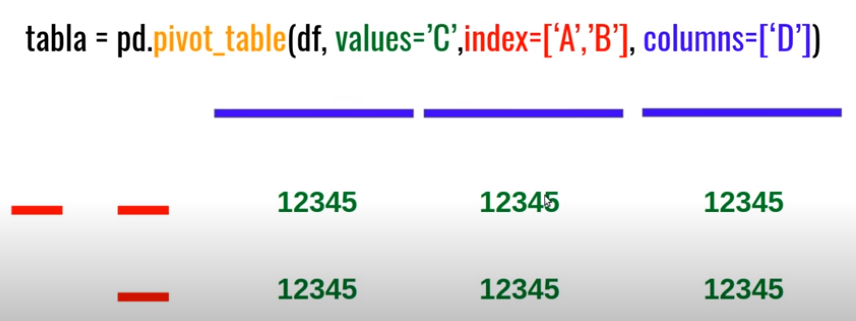

In [ ]:
# Some examples with other parameters

# Median is default function to summarize if you wanna use other specify it
data.pivot_table(values="a", index = "b", aggfunc = np.mean)
# If we want to group by another column we can specify the column
data.pivot_table(values="a", index = "b", columns="color",aggfunc = np.mean)
# To specify that for NaN values we want other thing specify fill_value
data.pivot_table(values="a", index = "b", columns="color", fill_value = 0, margin = True)
# Also this adds a column and row with the mean of each column and row without count the NaN values


In [ ]:
# EXAMPLE SUBSETTING BY DATES
# acces to year in column
date = data["date"].dt.year
# acces to month in column
date = data["date"].dt.month

# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperature

# Set date as an indexs_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)
temperatures_ind = temperatures.set_index("date")

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

### 1.4 Writing dataframe to CSV

In [ ]:
# reading a writting csv
# Write csv
data.to_csv("new_file.csv")

# 2. Plots

### 2.1 Seaborn
Basic plots

In [ ]:
#scatterplot
sns.scatterplot(x="xd",y="data")

#simple bar plot
sns.countplot(y="something")
# plot from data frame
sns.countplot(y="something", data = datos)
# distinct different colors based on column
sns.countplot(y="something", data = datos, hue = "Column", hue_order = ["Yes","No"], palette = hue_colors)
# you can personalize this color using 
hue_colors = {"Yes":"black","No":"red"} #after you call this dictionary with hue_colors

#subplots in columns 
sns.relplot(x = "something",y="column",kind = "scatter",data = datos,col = "column2")
#subplots in rows
sns.relplot(x = "something",y="column",kind = "scatter",data = datos,row = "column2")
#you can combine rows and columns

#to determine the number of graphs by column and the order:
#subplots in columns 
sns.relplot(x = "something",y="column",kind = "scatter",data = "dataframe",
           col = "column2",
          col_wrap = 3,
          size = "size", # chanze size from dots 
            hue = "size",# Change color according size from dots 
            style = "smoker", #change the style from the points
            alpha = 0.4, # transparency of the points 
            marker = True, #just for line plot marks the points that joins with lines
            dashes = False, #dont change the line style between groups
            ci = "sd" # shows the deviation from the points to the line, by default it shows an interval range
              #or it can be none
            col_order = ["Monday","Thursday","Friday"])


### 2.2 Customizing plots

In [ ]:
# customizing plots
sns.set_style("whitegrid") #add grid to plot
other styles available = ticks, dark, darkgrid

sns.set_palette("RdBu")

sns.set_context("paper","talk","poster","notebook")

# add labels and titles
g.fig.suptitle("Car Weight vs. Horsepower") # for relplot and catplot

g.set_title("Average MPG Over Time")

# add label
g.set(xlabel = "Car Model Year", ylabel = "Average MPG")

# Rotate x-tick labels
plt.xticks(rotation = 90)

# Change label from each column
plt.xticks([0,1],["No","Yes"])

### 2.3 Seaborn catplot and barplot
https://seaborn.pydata.org/generated/seaborn.catplot.html

In [ ]:
# bar plotsand count plots (categorical plots)
# count counts and shows frecuency
# bar reports the means
sns.catplot(x = "column",
           data = datos,
           kind = "count",
           order = ["first","segond","etc"])
# boxplot compares quantitative variable across qualitative variable
sns.catplot(x = "column",
           data = datos,
           kind = "box", 
           order = ["first","segond","etc"],
           sym = "", # to ommit the points that are so far
           whis = [5,95] # show percentiles
           whis = [0,100] #show min and max values
           )

# point plots, show mean from quantitative variable
# the difference between point and bar is that normally for bar plot
# we have a cuantitative variable and for point a cualitative

from numpy import median
sns.catplot(x = "column",
           data = datos,
           kind = "point",
            join = False, #delete the line between points
           estimator = median,#change the interval of confidence based on median
            capsize = 0.2,
            ci = None,
            hue = "column" #subset into groups
           )

### 2.4 Crosstab and heatmap with seaborn

In [ ]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


### 2.5 Facetgrid
Is an interesting plot because we can compare distinct levels from different columns and rows
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 

In [ ]:
# Facetfrid plot
# Example 1
g2 = sns.FacetGrid(df, 
             row = "Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Example 2
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")



Factor plot makes la "pair" barplot that helps to compare distinct levels from a column

In [ ]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])


### 2.6 Seaborn line regression plot (lmplot)
https://seaborn.pydata.org/generated/seaborn.lmplot.html 

In [ ]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
# Doing this produces like a faced grid plot based on the hue
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()


### Other userful code for plotting

In [ ]:
# rot is an argument for degrees to the x axis label
data.plot(kind="bar",title = "Hello world", alpha = 0.8, rot = 45)

#subsetting plot
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

Stacked plot

In [ ]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked = True)


# 3. Data cleaning

### 3.1 Duplicate data

In [ ]:
# drop duplicates
data.drop_duplicates(subset="column")
data.drop_duplicates(subset=["column1","column2"])


### 3.2 Missing data

In [ ]:
# detecting na values
data.isna()
# detecting missing values in columns
data.isna().any()
# sum the number of missing values in columns
data.isna().sum()
#remove NaN data
data.dropna()
# replace NaN data
data.fillna(0)

# generates a dataframe with true's and false's fro missing values
dataframe.isnull()

# missing values in columns
dataframe.isnull().sum()

# Drop all rows that are missing in a column
ri.dropna(subset=["column_name"], inplace=True)

# Change column type
data["column"] = ri.is_arrested.astype("new_type")

# Check column type
print(dataframe.column.dtype)

Missing data example

In [ ]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


### 3.3 Filling missing data

In [ ]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


# 4. Importing data 

### 4.1 Basic import

In [ ]:
# reading multiple data files
name_files = ["hello","world"]
dataframes = [pd.read_csv(f) for f in filenames]

# leer archivos con nombres parecidos
from glob import glob
filenames = glob('sales*.csv')
dataframes = [pd.read_csv(f) for f in filenames]



### 4.2 Importing data from MATLAB, SAS, Stata, HDF5, pickled files

In [ ]:
# Reading pickle files
import pickle
with open("data.pkl", "rb") as file:
    data = pickle.load(file)
print(data)

# Read excel files, interesting the sheets
data = pd.ExcelFile("data.xlsx")
print(data.sheet_names)

# each of this is a dataframe from different sheet from the excel
df1 = data.parse('sheet1')# sheet name, as a string
df2 = data.parse(0) # sheet index, as a float


    

In [ ]:
# import SAS
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Stata files
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata("disarea.dta")

In [ ]:
# Matlab files
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

In [ ]:
# import HDF5 files

# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)
    
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

#IS IMPORTANT TO WATCH THE KEYS    

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### 4.3 Read from SQL

In [ ]:
# Get data out from the data base SQL
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title, Employee FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size = 3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

### 4.5 SQL con pandas

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))


# JOIN SQL

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId")

# Print head of DataFrame
print(df.head())

### 4.6 Interesting BEAUTIFUL SOUP
You can analyze the content from a webpage this is also knowing as web scrapping


In [ ]:
# To analyze websites

# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

# 5. Joining data
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
join = data1.merge(data2, on='column_key', suffixes=('left dataframe1 key','right dataframe2 key'))

Joining multiple dataframes

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

left join

In [ ]:
# Just add how parameter
newdata = data1.merge(data2, on='id', how='left')

Vertical concatenation

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([data1, data2, data3],
                               join='inner',
                               sort=True)

# Another example
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])


Verifying joins

In [ ]:
data1.merge(data2, on = "tid", validate = "one_to_one")
pd.concat([data1,data2],verify_integrity = True)

Merge asof

In [ ]:
# This works when you need to merge two dataframes with the key column that isn't exactly the same in the two dataframes
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# 6 Managing dates

In [ ]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

#suppose hurricane is a date object
hurricane.month
hurricane.year
hurricane.day


In [ ]:
# math in dates
# you can also use functions like min and max
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007,12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

#sort dates
dates_ordered = sorted(dates_scrambled)

In [ ]:
# change format to dates

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
# Convert to any order format
us = "Our earliest hurricane date: " + first_date.strftime("%Y/%m/%d")

# datetime

# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(year = 2017, month = 10, day = 1, hour = 15, minute = 26, second = 26)

# Print the results in ISO 8601 format
print(dt.isoformat())


# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
date = '2017-02-03 00:00:01'

# Write a format string to parse s
format = '%Y-%m-%d %H:%M:%S'
#ISO format 
"%Y-%m-%dT%H:%M:%S"

# Create a datetime object d
d = datetime.strptime(date, format)

### 6.1 Timezones

In [ ]:
# Example changing time zone

# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours = 11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

### 6.2 Reading date columns as type date no object

In [ ]:
# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ["Start date","End date"])

# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

# 7. Stats

### 7.1 ECDF

In [ ]:
# ECDF empirical cumulative distribution function
# is superinteresting to explore data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1 , n + 1) / n

    return x, y

### 7.2 Pearson correlation
Is the variability in codependence (covariance) divided by the variability independently

In [ ]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

In [ ]:
def pearson_r(x, y):
  at = np.corrcoef(x,y)

    # Return entry [0,1  """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_m]
    return corr_mat[0,1]

### 7.3 Creating distributions

In [ ]:
# Create normal distribution sampling
samples_std1 = np.random.normal(20, 1, 100000)

# Binomial distribution
np.random.binomial(100, 0.05, size = 10000)

# Exponential distribution
np.random.exponential(tau1, size=size) # unique parameter mean

### 7.4 RMSE and MSE

# 8. Modelling and tools for models

### 8.1 KNN (k-nearest neighbors)

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable

#This are converted to numpy arrays to use the classifier
y = df['party'].values # this are the values that we are trying to predict or target
X = df.drop('party', axis=1).values # this are the features or labels

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

### 8.1.1 Kmeans

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of n

Another example

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c = labels, alpha =0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)
plt.show()

### 8.1.2 Evaluating clustering

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

### 8.1.3 Solving problems clustering
Usually when the cluster dont work you gonna need to use standarization<br>
(there's somes types to investigate) after that the clustering should work perfectly

In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans
                         
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

Other method to fix problem

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

### 8.1.4 Dendogram

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = "complete")

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### 8.2 Measuring perfomance and plotting results
This code can be applied to any model 

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Print the accuracy
# Fit the classifier to the training data
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


Plotting results

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 8.3 Line Regression
Preparing data before applying model 

In [ ]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv("gapminder.csv")

# Create arrays for features and target variable
y = df["life"].values
X = df["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Applying model

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

### 8.4 Cross validation

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

### 8.5 Ridge Regression

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X,y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### 8.6 Lasso Regression

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

### 8.7 Confussion Matrix

### 8.8 Confusion matrix 

### concepts

true positives tp,
false positives fp,
true negatives tn,
false negatives fn

precision: tp/tp+fp <br>
recall: tp/tp+fn or called to sensibility<br>
F1score: 2 * precision * recall / precision + recall


In [ ]:
# Import necessary modules
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### 8.9 Logistic Regression

In [ ]:
# used in clasification problems no regression problems

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### 8.10 ROC and AUC curve
Roc Curve

In [ ]:
# used in clasification problems no regression problems

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AUC Curve

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

### 8.11 Hyperparameters

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

### 8.12 Centering, scalling and normalizing your data

In [ ]:
# Example
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

### 8.13 PCA (Principal component analysis)
Intrisical dimension with PCA
this is a method to discard some variables from the analysis
in base from the variability of each variable

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Dimesion reduction with PCA

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

In some cases this doesn't work so we use another library
this is for analyze for example frecuency of words in a document

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

### 8.14 Decision tree for classification


### 8.14.1 Classification tree

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth = 6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# Evaluando el modelo
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Classification tree learning <br>
Note that the decision tree has other criteria for making classification
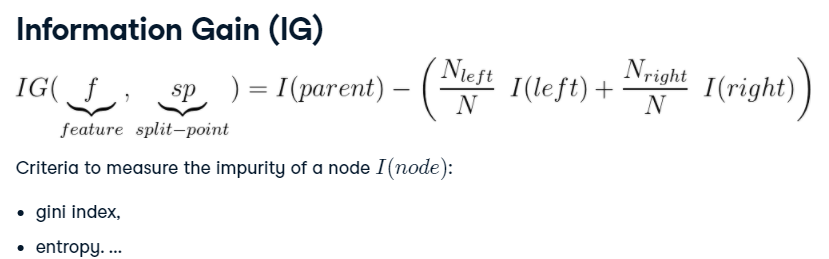

### 8.14.2 Regression tree
With RMSE and MSE

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Obteniendo RMSE
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

### 8.14.3 Ensemble learning

*Decision and regression trees*
- Advantages:
1.  Easy to interpret
2.  Easy to use
3.  Flexibility to describe linear regressions
4.  Don´t need preprocess

-  Limitations:
Solo produce decisiones ortogales
Sensible a pequenas variaciones
Gran varianza

*Solution: Ensemble learning* 

This is a technique that tries to combine to models and each model makes their own predictions. After that you generate a meta model that sums this individual predictions to generate a final prediction with less errors


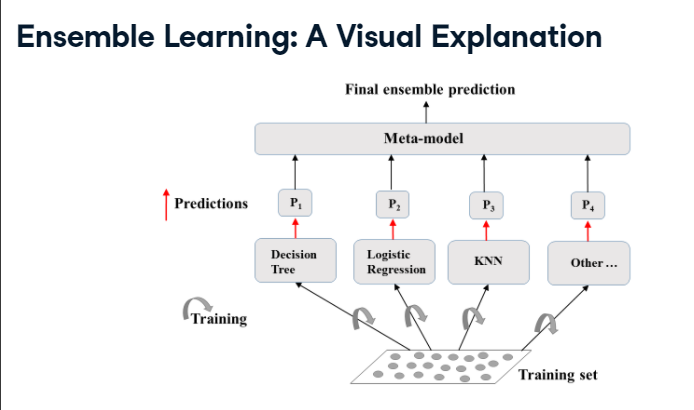

### Ensemble Methods

*Voting clasfifier*

*   Todos los modelos usan el mismo training set
*   Every model use the same training set
*   Different algorithms

*Bagging* 

*   Just one algorithms
*   Different training set


### 8.14.4 Voting Classifier
This method consists in different models that makes their own predictions, with 0's and 1's to latter apply hard voting where the model that will prevails is the one with more votes.


In [ ]:
## Ensemble learning

# Primero instanciamos los distintos modelos
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iteramos sobre los distintos modelos e imprimos su accuracy

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# Creacion del meta modelo

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

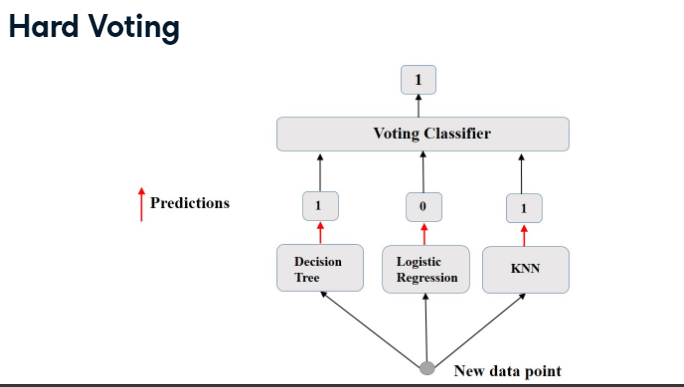

### 8.14.5 Bagging
This method uses a technique called bootstrap, reduce the variance from the models that form the ensemble


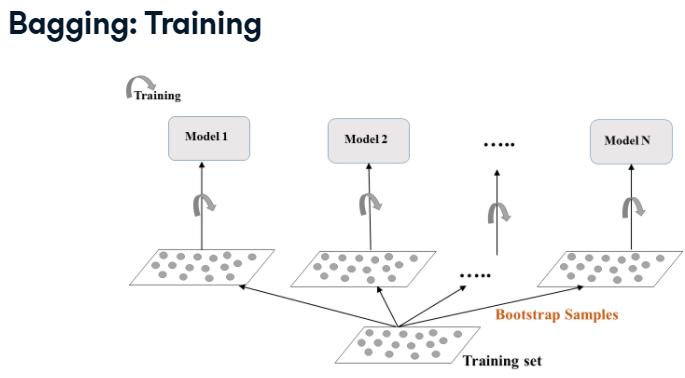

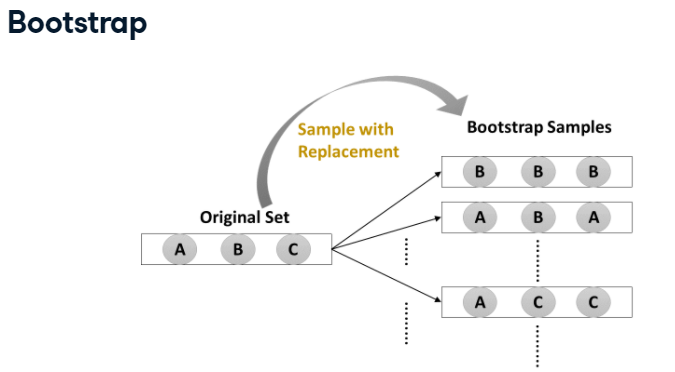

### Bagging classification and Regression

*Classification:*
* Aggregates predictions by majority voting
* BaggingClassifier in scikit-learn

*Regression:*

* Aggregates predictions through averaging
* Bagging Regressor in skitlearn

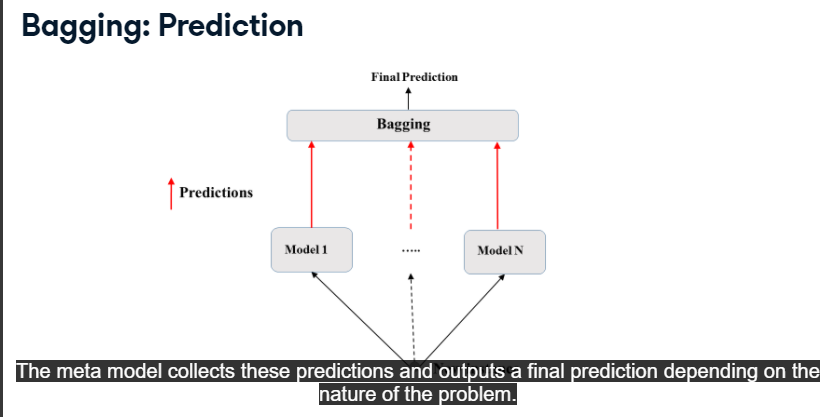

In [ ]:
# Instanciando el bagginclassifier

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Aplicamos el modelo generado
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

### 8.14.6 Out of Bag Evaluation
Sometimes when we make the boostrap process, there's some samples that are repeated or are not even taken. In the next image we can wee in blue the sample from bootstrap while the red sample are OUT OF THE BAG. BAAAAAAAAMMM


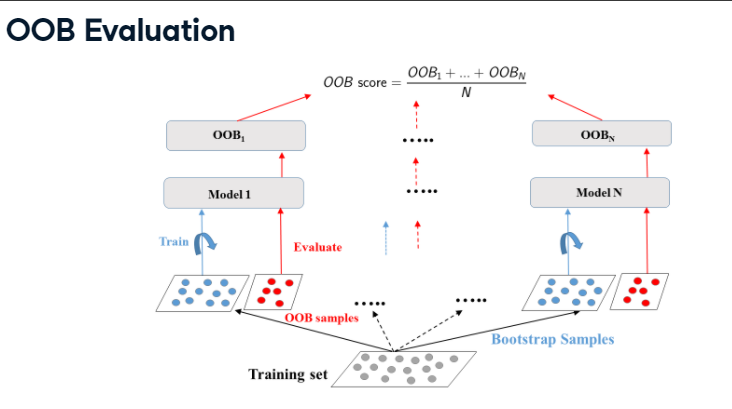

In [ ]:
# Importando OOB classifier y sampleando la data
# Notar que la data se divide con strtify = y

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

### 8.15 Random Forest

Each stimator is trained with a different samplet, everyone with same size.

In the different nodes that we created we train a classification tree and we user just some feature from the total features

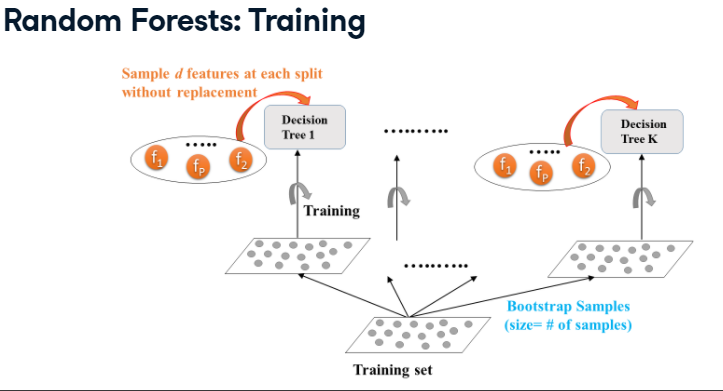

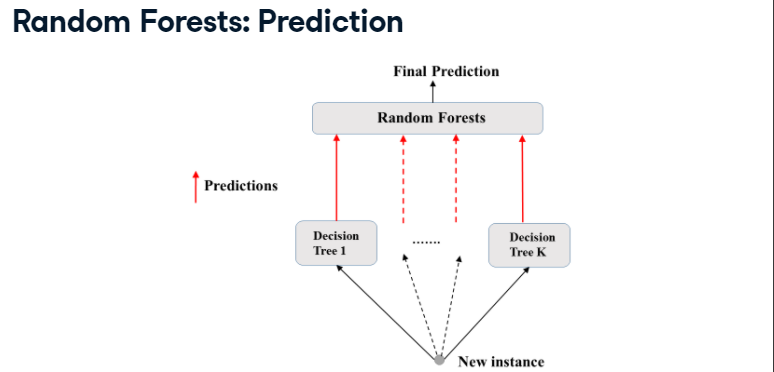

Depending on the nature from the problem we should use a random forest for classification or gression.

Also is important to mention that we have to see the importance of each feature.

*Classification:*
* Aggregates predictions by majority voting
* RandomForestClassifier in scikit-learn

*Regression:*
* Aggregates predictions through averaging
* RandomForestRegressor in scikit-learn

In [ ]:
# Creating RandomForest

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Evaluando el modelo
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

# Importancia de cada variable
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Output plot from the last code

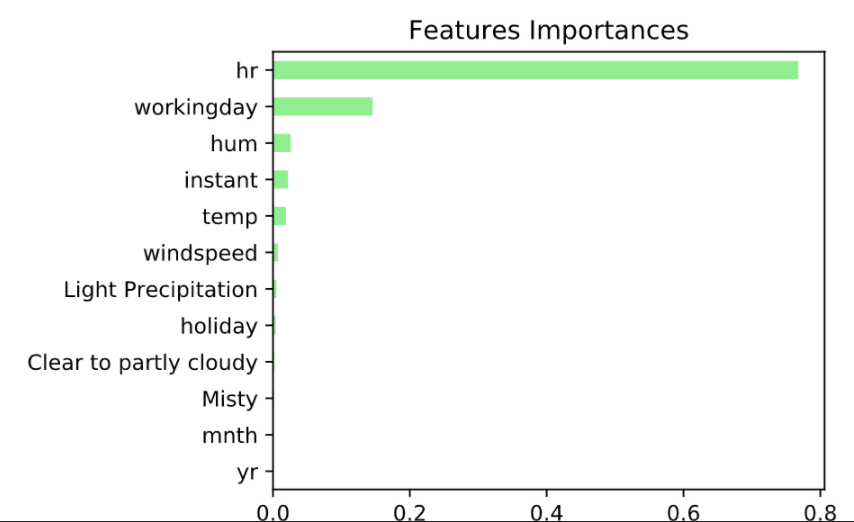

8.15.1 Boosting
First we need to define what is a weak model, a weak model is a model that has results a little bit better that a total random prediction.
The idea from boosting is training simple models sequentially, each of those correcting the predecessor. There's two popular methods:

* AdaBoost
* Gradient Boosting


### 8.15.1 Adaboost

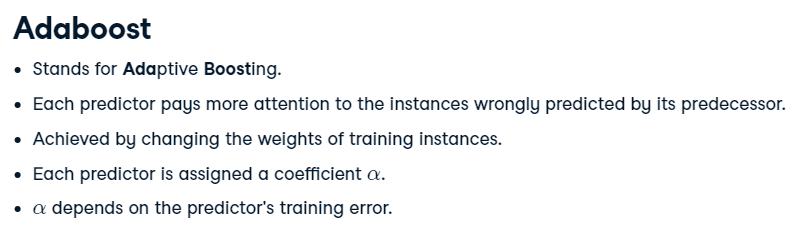

### Let's take a look to AdaBoost process:
First we see that predictor 1 is trained by an initial dataset and determine the error for this predictor,

this error can be used to determine alpha 1 that is the coefficient for predictor 1,

then alpha 1 is used to calculate the weight for the instances for the predictor 2,

note that green points has more weight then we force to the modetl to fix the samples. We repeat the process n times.


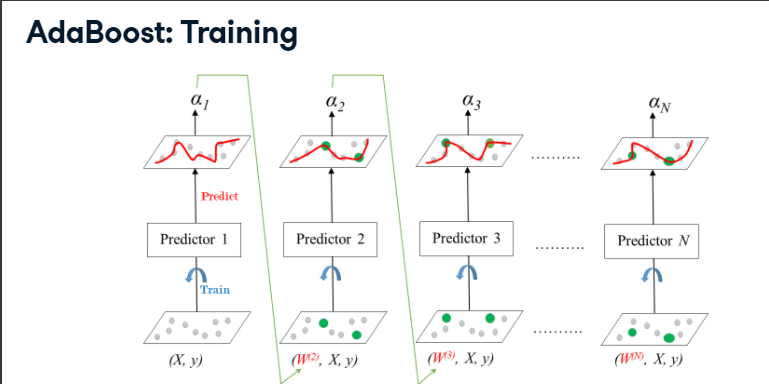

### 8.15.1* Learning rate
This is used regularly to make that the alpha coefficient doesn't increase to much.

This number is related to the quantity of stimators, with more stimators the learning rate is smaller.

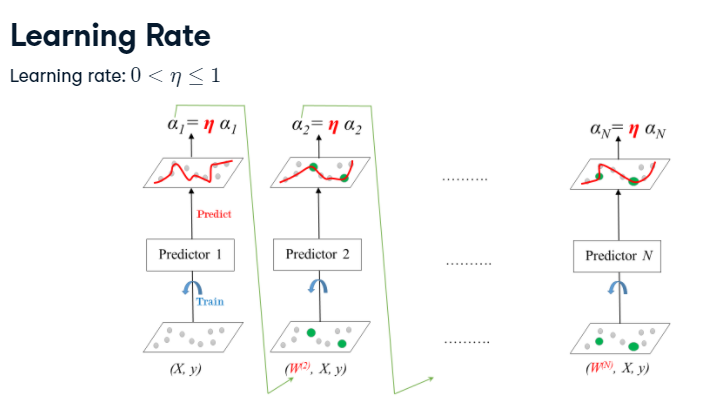

AdaBoost: Prediction

*Classification:*

* Weighted majority voting.
* In sklearn: AdaBoostClassifier

*Regression:*

* Weighted average.
* In sklearn: AdaBoostRegressor

In [ ]:
# Importamos y spliteamos la data
# Instanciamos classification tree y adaboost classifier

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Obtenemos las probabilidades 

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Obtenemo ROC AUC score
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

### 8.15.2 Gradient Boosting



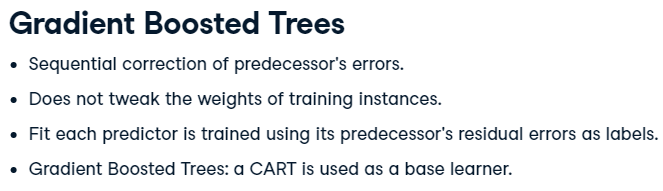

The training is similar that in Adaboost boot the difference is that instead of using the error (alpha coefficient) we work here with the residuals

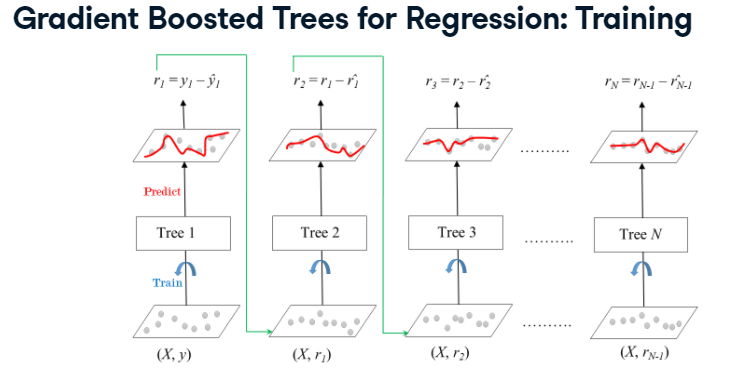

We multiply the resdiual by n

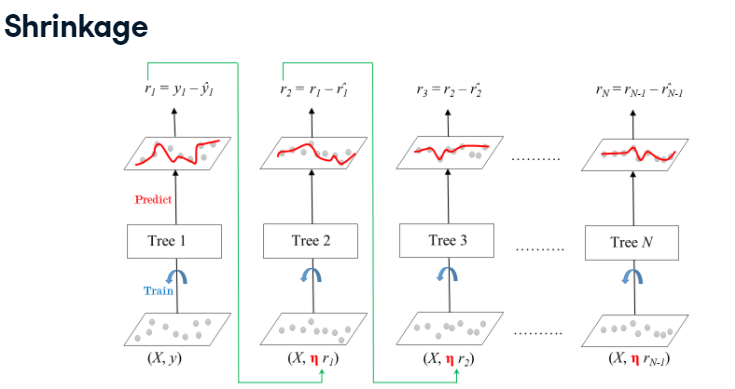

In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = mse_test ** (1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

### 8.15.3 Gradient boosting cons

* Gradient boost is a exhaustive process (Requires a lot of computer power)
* Each CART is trained to find the best points and features, so this can lead to use the same points and maybe the same features
* For this you need to use the following technique


### 8.15.4 Stochastic gradient boosting

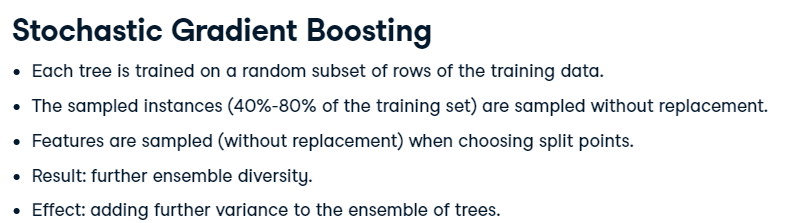

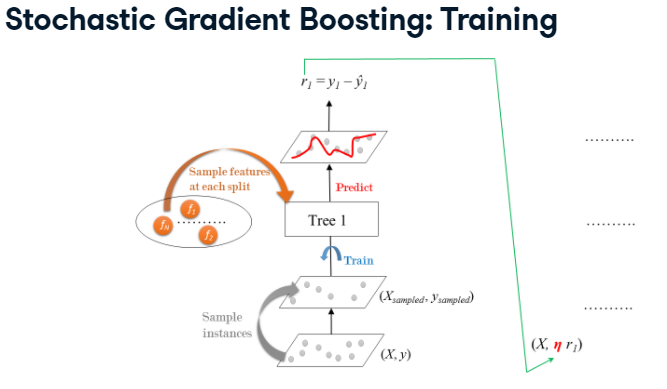

In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### 8.15.5 Tuning of decision trees with HYPERPARAMETERS

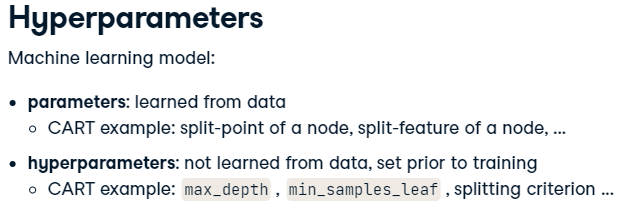

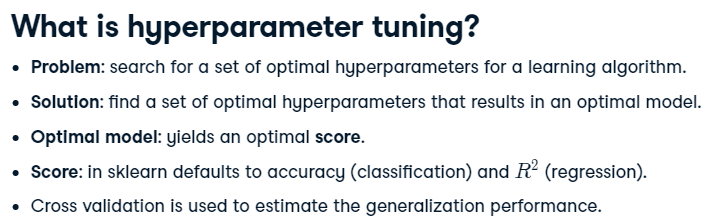

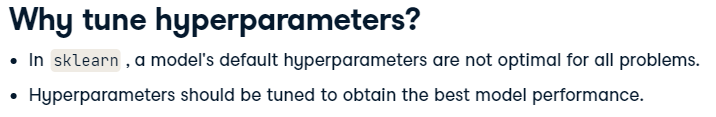

### Methods to improve hyperparametrization

* Grid Search
* Random Search
* Bayesian Search
* Bayesian Optimization

### 8.15.6 Grid search

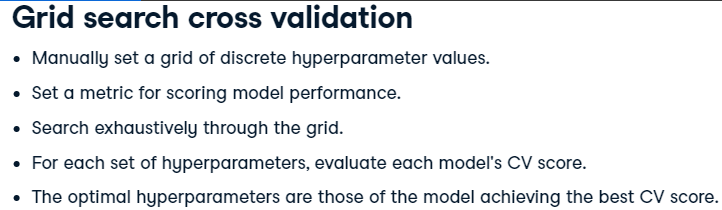

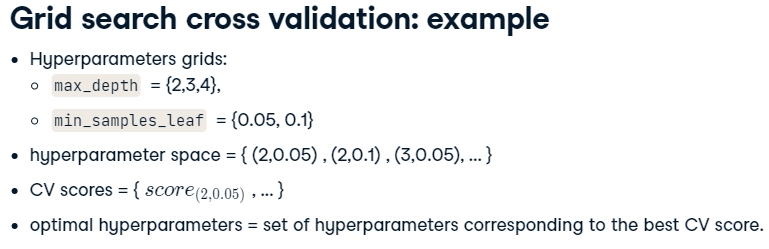

In [2]:
# First we define the parameters that we want to prove in a dictionary
# Define params_dt
params_dt = {
    'max_depth':[2,3,4],
    'min_samples_leaf':[0.12,0.14,0.16,0.18]
}
# dt denota un model de decision tree

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Get the values for a better model
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# 9. Others and pending

### 9.1 Query


In [ ]:
# Select dates equal to or greater than 2016-01-01
datanew = data.query('column >= "2016-01-01"') # this can filter by dates, integers, etc

### 9.2 What do I do if the dataset is too large?

In [ ]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv("tweets.csv", chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk["lang"]:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)

### 9.3 Mapping INTERESTING

In [ ]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [ ]:
# Calculating with a given value, lets say for example: mean, median, mode
datos.divide(mean, axis = "rows")

# to do current - before / before use
datos.pct_change()

# add two different dataframes
bronze.add(silver, fill_value = 0)

### 9.4 Change from object to categorie variable
Advantages:
Smallest size
orderable, you can compare them

In [ ]:
# Create a list of weather ratings in logical order
cats = ["good","bad","worse"]

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype("category", ordered=True, categories = cats)

### 9.5 RandomizedSearchCV is best to work with a lot of data

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
logreg_cv = RandomizedSearchCV(logreg, param_dist, cv=5)

### 9.6 Converting categorical features to numerical features

In [ ]:
# primero spliteamos la data y creamos el modelo

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

# Ahora obtenemos el error del cross validation

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Ahora a obtener el error de la data de entrenamiento

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = MSE(y_train, y_pred_train) ** (1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

### 9.7 Diagnose bias and variance problems

In [ ]:
# Drop 'Region_America' from df_region
df_region = pd.get_dummies(df, drop_first=True)

# 10. Definitions 

### Variance and Bias

*Variance*

Utilizar cross validation para ver que tal,
si el CV > al error del training data entonces
tenemos un problema de alta varianza, es decir tenemos un modelo con overfitting, por ejemplo con el arbol de decision hay que disminuir
la profundidad del arbol e incrementar el numero de muestra por hojas. Reunir mas datos.

*Bias*

Realizamos CV de nuevo y si este error es similar al error del training
dataset entero y mas grande que el error deseado tenemos un problemas de
Bias.
Para solucionarlo incrementamos la complejidad del modelo por ejemplo
aumentar la profundidad del arbol o reduciendo el numero de muestras
por separacion.
Tambien escogiendo caracteristicas mas relevantes

###(Index, indice)
indices refers to multi index in one dataframe
indexes many index from diferent data frame